# Задача 2. Вариант 11

# Постановка задачи
Используя метод переменных направлений, решить краевую задачу:
\begin{equation*}
\begin{cases}
   \displaystyle \frac{\partial u}{\partial t} = \Delta u + \sin x \sin y \cdot e^{-t}, \; \; 0 < x < \pi, \; \; 0 < y < \pi, \; \; t > 0\\ 
   u|_{x=0} = u|_{x=\pi} = 0, \\ 
   u|_{y=0} = u|_{y=\pi} = 0, \\
   u|_{t=0} = 0
\end{cases}
\end{equation*}

# Аналитическое решение задачи
Будем искать решение в виде:
$$
u(x,y,t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} R_{nm}(x,y) T_{nm}(t)
$$
Решая задачу методом разделения переменных, получим:
$$
\displaystyle \frac{T'(t)}{T(t)} = \frac{R''(x,y)}{R(x,y)} = - \lambda
$$
Для функции $R(x,y)$ имеем задачу Штурма-Лиувилля:
$$
\begin{cases}
   R'' + \lambda R = 0 \\
   \displaystyle R|_{x=0} = R|_{x=\pi} = 0 \\
   \displaystyle R|_{y=0} = R|_{y=\pi} = 0 
\end{cases}
$$
Представим функцию $R$ в виде: $R(x,y) = X(x)Y(y)$ и вновь применим метод разделения переменных. Получаем две задачи Штурма-Лиувилля на отрезке:
$$
\begin{cases}
   X'' + \nu X = 0 \\
   X|_{x=0} = X|_{x=\pi} = 0
\end{cases} \Rightarrow X_n = \sin nx, \; \nu_n = n^2, \;n=1,2,...
$$


$$
\begin{cases}
   Y'' + \mu Y = 0 \\
   \displaystyle Y|_{y=0} = Y|_{y=\pi} = 0 
\end{cases} \Rightarrow Y_m = \sin my, \; \mu_m = m^2, \;m=1,2,...
$$
Получаем набор собственных функций и собственных значений:
$$
R_{nm} = \sin nx \sin my 
$$
$$
\lambda_{nm} = \nu_n + \mu_m = n^2 + m^2
$$
%Тогда решение $u(x,y,t)$ представляется в виде:
$$
%u(x,y,t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} R_{nm}(x,y) T_{nm} e^{-\lambda t}
$$
Для $T_{nm}$ имеем задачу Коши:
$$
\begin{cases}
   \displaystyle \frac{dT}{dt} + \lambda T = f(t) \\
   T|_{t=0} = 0
\end{cases} 
$$
Ее общее решение представимо в виде:
$$
T_{nm} = \phi_{nm} e^{-\lambda_{nm} t} + \int_0^t e^{\lambda (1-\tau)} f_{nm}(\tau)d\tau
$$
где
$$
\displaystyle \phi_{nm} = \frac{1}{\parallel R_{nm} \parallel ^2} \iint \Phi(x,y,t)R_{nm}(x,y)dxdy
$$
$$
\displaystyle f_{nm} = \frac{1}{\parallel R_{nm} \parallel ^2} \iint F(x,y,t)R_{nm}(x,y)dxdy \\
$$
где
$$
\parallel R_{nm} \parallel ^2 = \parallel X_n \parallel ^2 \parallel Y_m \parallel ^2 = \frac{\pi}{2} \cdot \frac{\pi}{2} = \frac{\pi ^2}{4}
$$

В силу того, что $\Phi=0$, $\phi_{nm} = 0$. Для $f_{nm}$ имеем:
$$
f_{nm} = \frac{4 e^{-t}}{\pi ^2} \int_0^{\pi} \sin nx \cdot \sin x dx \int_0^{\pi} \sin my \cdot sin y dy = 0 \; при \; \forall n,m > 1 
$$
$$
f_{nm} = \frac{4 e^{-t}}{\pi ^2} \frac{\pi}{2} \frac{\pi}{2} = e^{-t} \; при \; n,m = 1
$$
Тогда для $T_{nm}$:
$$
T_{nm} = 0 \; при \; \forall n,m > 1
$$
$$
T_{nm} = T_{11} = \int_0^t e^{-\lambda_{11} (t-\tau)} e^{-\tau}d\tau = e^{-2t} \left( e^t - 1 \right) \; при \; n,m = 1
$$
Для $u(x,y,t)$ окончательно имеем:
$$
u(x,y,t) = \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} R_{nm}(x,y) T_{nm}(t) = R_{11}(x,y) T_{11}(t) = \sin x \cdot \sin y \cdot e^{-2t} \left( e^t - 1 \right)
$$
$$
u(x,y,t) = \sin x \cdot \sin y \cdot e^{-2t} \left( e^t - 1 \right)
$$
Построение графика аналитического решения:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

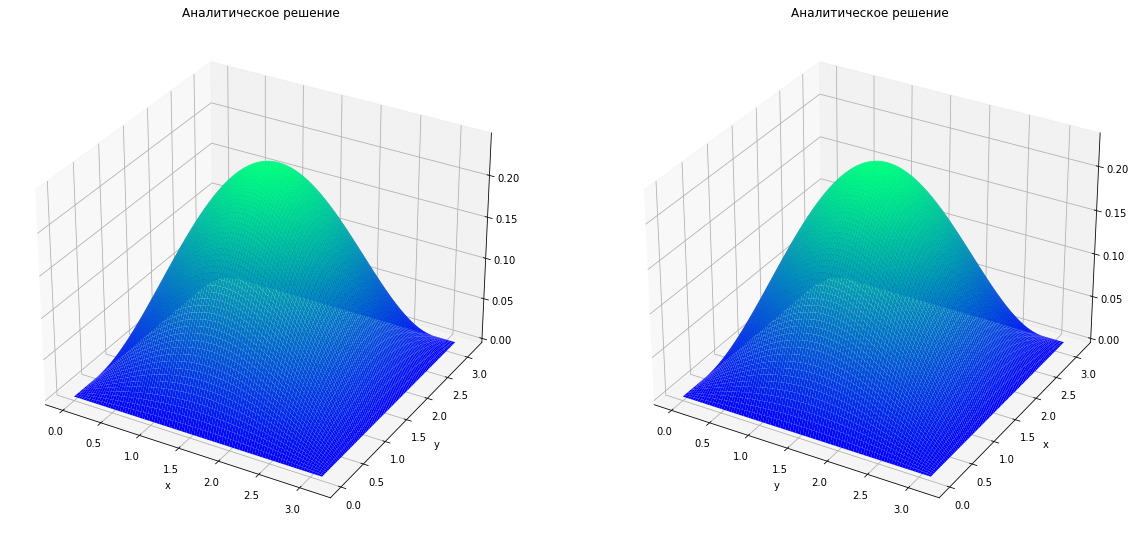

In [11]:
Nx, Ny, M = 100, 100, 60 # шаги сетки

x0, x1 = 0, np.pi
y0, y1 = 0, np.pi
t0, t1 = 0, 1 #0.19095477 #1

x = np.linspace(x0, x1, Nx)
y = np.linspace(y0, y1, Ny)
t = np.linspace(t0, t1, M)

u_tochn = np.zeros((Nx, Ny, M))
                
for n in range(Nx):
    for m in range(Ny):
        for j in range(M):
            u_tochn[n, m, j] = np.sin(x[n])*np.sin(y[m])*np.exp(-2*t[j])*(np.exp(t[j]) - 1)
            
fig = plt.figure(figsize=(20,10))
x, y = np.meshgrid(x, y)
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x, y, u_tochn[:,:,50], rstride=1, cstride=1, cmap='winter')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аналитическое решение')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(y, x, u_tochn[:,:,-1], rstride=1, cstride=1, cmap='winter')
plt.xlabel('y')
plt.ylabel('x')
plt.title('Аналитическое решение')

plt.show()

# Численное решение. Схема переменных направлений
Для применения схемы введем в расчетной области $\Omega = G \bigotimes [0,T]$ двумерную пространственную и одномерную временную сетку:
$$
G = \{ (x,y): 0 \le x \le \pi, \; o \le y \le \pi \}
$$
$$
\overline{w_h} = \{ (x_n,y_m): x_n=nh_x, \; n=\overline{0,N}, \; h_x N=\pi; \; y_m=mh_y, \; m = \overline{0,M}, \; h_y M = \pi \} 
$$
$$
\overline{w_r} = \{ t_j=j\tau, \; j=\overline{0,J}, \; J\tau = T \}
$$Где $h_x$, $h_y$ и $\tau$ = шаги по координатам $x$, $y$ и $t$. 

Осуществим переход от дифференциальной задачи к разностной следующим образом:
$$
\Delta w^j \rightarrow \Lambda w^j = \Lambda_1 w^j + \Lambda_2 w^j
$$
Для этого на введенной сетке будем рассматривать сеточные функции $w_{n,m}^j$ и заменим дифференциальные операторы 
$
\frac{\partial ^2}{\partial x^2}, \frac{\partial ^2}{\partial y^2}
$
их разностными аналогами:
$$
\displaystyle \Lambda_1 w^j = \frac{w_{n-1,m}^j - 2w_{n,m}^j + w_{n+1,m}^j}{h_{x}^2}
$$
$$
\displaystyle \Lambda_2 w^j = \frac{w_{n,m-1}^j - 2w_{n,m}^j + w_{n,m+1}^j}{h_{y}^2}
$$
где $w_{n,m}^j = u(x_n,y_m,t_j)$.

Для решения нашей задачи введем полуцелые слои, каждый из которых расположен
между целыми значениями $j, j+1$. Расстояния между целыми и полуцелыми слоями, соответственно, равны $\frac{\tau}{2}$.

В данной задаче будем рассматривать схему переменных направлений,
являющейся объединением явной и неявной схемы. При переходе со слоя $j$ на $j+1/2$ будем использовать неявную схему по переменной $x$ и явную схему по переменной $y$. При переходе с полуцелого слоя $j+1/2$ на следующий целый слой $j+1$ будем пользоваться неявной схемой по переменной $y$ и явной по $x$. Таким образом, получаем разностную задачу в виде:
$$
\begin{cases}
    \displaystyle \frac{w_{n,m}^{j+\frac{1}{2}} - w_{n,m}^j}{0,5\tau} = \Lambda_1 w_{n,m}^{j+\frac{1}{2}} + \Lambda_2 w_{n,m}^j + \sin x_n \cdot \sin y_m \cdot e^{-t_{j+1/2}} \newline
    \displaystyle \frac{w_{n,m}^{j+1} - w_{n,m}^{j+\frac{1}{2}}}{0,5\tau} = \Lambda_1 w_{n,m}^{j+1} + \Lambda_2 w_{n,m}^{j+\frac{1}{2}} + \sin x_n \cdot \sin y_m \cdot e^{-t_{j+1/2}}
\end{cases}
$$
Подробнее:
$$
\begin{cases}
    \displaystyle \frac{w_{n,m}^{j+\frac{1}{2}} - w_{n,m}^j}{0,5\tau} = \frac{w_{n-1,m}^{j+\frac{1}{2}} - 2w_{n,m}^{j+\frac{1}{2}} + w_{n+1,m}^{j+\frac{1}{2}}}{h_{x}^2} + \frac{w_{n,m-1}^j - 2w_{n,m}^j + w_{n,m+1}^j}{h_{y}^2} + \sin x_n \cdot \sin y_m \cdot e^{-t_{j+1/2}} \\
    \displaystyle \frac{w_{n,m}^{j+1} - w_{n,m}^{j+\frac{1}{2}}}{0,5\tau} = \frac{w_{n-1,m}^{j+1} - 2w_{n,m}^{j+1} + w_{n+1,m}^{j+1}}{h_{x}^2} + \frac{w_{n,m-1}^{j+\frac{1}{2}} - 2w_{n,m}^{j+\frac{1}{2}} + w_{n,m+1}^{j+\frac{1}{2}}}{h_{y}^2} + \sin x_n \cdot \sin y_m \cdot e^{-t_{j+1/2}}
\end{cases}
$$
Таким образом, рассматривая первое уравнение системы и добавляя к нему граничные условия по $x$, то для каждого из фиксированных значений $𝑦_𝑚$ полученное уравнение можно решить методом прогонки.

Далее, зная значения функции на полуцелых слоях, дополним второе из уравнений
системы граничными условиями по $y$ и аналогично первому случаю, решим для
каждого из фиксированных значениях $𝑥_𝑛$ систему методом прогонки.

Начальные условия нашей задачи аппроксимируются точно:
$$
w_{n,m}^0 = 0, \; n=\overline{0,N}, \; m=\overline{0,M}
$$
Причем в силу однородности начальных условий в задаче, данные условия применимы и для полуцелых слоев.

Граничные условия также аппроксимируются на каждом временном слое $j$ точно:
$$
w_{0,m}^j = 0, w_{N, m}^j = 0, \; m=\overline{0,M}
$$
$$
w_{n,0}^j = 0, w_{n, M}^j = 0, \; n=\overline{0,N}
$$

Таким образом, переписывая операторы в явном виде и проделывая математические преобразования, получаем следующее:
$$
\begin{cases}
\displaystyle \frac{1}{2} \gamma_1 w_{n-1,m}^{j+\frac{1}{2}} - (1+\gamma_1)w_{n,m}^{j+\frac{1}{2}} + \frac{1}{2} \gamma_1 w_{n+1,m}^{j+\frac{1}{2}} = - \left( (1-\gamma_2)w_{n,m}^{j} + \frac{1}{2} \gamma_2 \left( w_{n,m-1}^{j} + w_{n,m+1}^{j} \right) \right) = -F_n^x, \; m=\overline{1,M-1} \\
w_{0,m}^j = 0, w_{N, m}^j = 0, \; m=\overline{0,M} \\
\displaystyle \frac{1}{2} \gamma_2 w_{n,m-1}^{j+1} - (1+\gamma_2)w_{n,m}^{j+1} + \frac{1}{2} \gamma_2 w_{n,m+1}^{j+1} = - \left( (1-\gamma_1)w_{n,m}^{j+\frac{1}{2}} + \frac{1}{2} \gamma_1 \left( w_{n-1,m}^{j+\frac{1}{2}} + w_{n+1,m}^{j+\frac{1}{2}} \right) \right) = -F_m^y, \; n=\overline{1,N-1} \\
w_{n,0}^j = 0, w_{n, M}^j = 0, \; n=\overline{0,N}
\end{cases}
$$
где $\gamma_1 = \frac{\tau}{h_x^2}$, $\gamma_2 = \frac{\tau}{h_y^2}$.

Если ввести коэффициенты
$$
A_x = B_x = \frac{1}{2} \gamma_1, C_x = 1+\gamma_1 \\ A_y = B_y = \frac{1}{2} \gamma_2, C_y = 1+\gamma_2
$$
то можно получить систему уравнений, которая решается с помощью метода прогонки.

# Метод прогонки
Пусть необходимо решить следующую систему алгебраических уравнений с постоянными коэффициентами. Рассмотрим систему:
$$
\begin{cases}
    A_n W_{n-1} - C_n W_n + B_n W_{n+1} = -F_n, \; n=\overline{1,N-1} \\
    W_0 = p_1 W_1 + q_1, W_N = p_2 W_{N-1} + q_2
\end{cases}
$$
Для устойчивости метода необходимо выполнение следующего требования:
$$
|C_n| > |A_n|+|B_n|, \; 0 \le p_{1,2} \le 1 \; || \; |C_n| \ge |A_n|+|B_n|, \; 0 \le p_{1,2} < 1
$$
Для решения системы положим, что значения искомой функции в двух соседних
точках связаны линейным соотношением:
$$
W_n = \alpha_{n+1} W_{n+1} + \beta_{n+1}
$$
где $\alpha$, $\beta$ - прогоночные коэффициенты.

Для определения коэффциеинтов выразим $W_{n-1}$ и $W_n$ через $W_{n+1}$ и подставим в систему. Тогда получим рекуррентные соотношения для определения коэффициентов:
$$
\alpha_{n+1} = \frac{B_n}{C_n-A_n \alpha_n} , \; \beta_{n+1} = \frac{F_n + A_n \beta_n}{C_n - A_n \alpha_n}
$$
Из граничного условия $W_0 = p_1 W_1 + q_1 = W_1$ получаем:
$$
p_1 = \alpha_1 = 0, \; q_1 = \beta_1 = 0
$$
Используя рекуррентные соотношения, определим остальные прогоночные коэффициенты, делая прогонку в направлении возрастания индекса: вычисление
коэффициентов $\alpha_{n+1}$ и $\beta_{n+1}$. Зная эти коэффициенты и используя ГУ $W_N = p_2 W_{N-1} + q_2 = W_{N-1}$, получаем: $p_2=0$, $q_2=0$.

Тогда
$$
W_N = \frac{q_2 + \beta_N p_2}{1 - \alpha_N}
$$
Обратный ход прогонки: по известным $W_N$ и $\alpha_{n+1}$, $\beta_{n+1}$ совершаем обратную прогонку в направлении уменьшения значений индекса, определяя значения $W_n$ по формуле $W_n = \alpha_{n+1} W_{n+1} + \beta{n+1}$.

Заметим, что достаточные условия устойчивости выполняются:
$$
|A_n|+|B_n|=\gamma_1 < 1+\gamma_1 = |C_n|, \; n=\overline{1,N-1}
$$
Для перехода со слоя $j+1/2$ на слой $j+1$ решается аналогичная задача с помощью метода прогонки при каждом фиксированном $n=1,2,...,N-1$. Таким образом находим значение функции $w^{j+1}$ на $j+1$ слое. Далее - на каждом слое.

# Аппроксимация разностной схемы
Найдём порядок аппроксимации используемой разностной схемы. Для этого разложим в ряд Тейлора до соответствующих порядков производные по времени и координатам и используем полученные ранее аппроксимации производных:
$$
\begin{cases}
    \displaystyle w^{j+1} = w^{j+\frac{1}{2}} + \frac{\tau}{2} w_t^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau ^2}{4} w_{tt}^{j+\frac{1}{2}} + \frac{1}{2} \frac{\tau ^3}{8} w_{ttt}^{j+\frac{1}{2}} + O(\tau ^4) \\
    \displaystyle w^{j} = w^{j+\frac{1}{2}} - \frac{\tau}{2} w_t^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau ^2}{4} w_{tt}^{j+\frac{1}{2}} - \frac{1}{2} \frac{\tau ^3}{8} w_{ttt}^{j+\frac{1}{2}} + O(\tau ^4) 
\end{cases}
$$
Тогда в точке $t^{j+\frac{1}{2}}$ аппроксимация производной по времени:
$$
\displaystyle \frac{w^{j+1}-w^j}{\tau} = \frac{1}{\tau} \left( \tau w_t^{j+\frac{1}{2}} + \frac{1}{3} \frac{\tau ^3}{8} w_{ttt}^{j+\frac{1}{2}} + O(\tau ^4) \right) = w_t^{j+\frac{1}{2}} + \frac{1}{3} \frac{\tau ^3}{8} w_{ttt}^{j+\frac{1}{2}} + O(\tau ^3) = w_t^{j+\frac{1}{2}} + O(\tau ^2)
$$
Аналогично аппроксимируются производные по координатам:
$$
\displaystyle \Lambda_1 w = \frac{w_{n-1,m} - 2w_{n,m} + w_{n+1,m}}{h_{x}^2}
$$
$$
\displaystyle \Lambda_2 w = \frac{w_{n,m-1} - 2w_{n,m} + w_{n,m+1}}{h_{y}^2}
$$
Раскладываем в ряд Тейлора $w_{n+1,m}$ и $w_{n-1,m}$:
$$
\begin{cases}
    \displaystyle w_{n+1,m} = w_{n,m} + h_x w'_{n,m} + \frac{1}{2} h_x^2 w''_{n,m} + \frac{1}{6} h_x^3 w'''_{n,m} + \frac{1}{24} h_x^4 w''''_{n,m} + O(h_x^5) \\
    \displaystyle w_{n-1,m} = w_{n,m} - h_x w'_{n,m} + \frac{1}{2} h_x^2 w''_{n,m} - \frac{1}{6} h_x^3 w'''_{n,m} + \frac{1}{24} h_x^4 w''''_{n,m} + O(h_x^5)
\end{cases}
$$
Откуда получаем:
$$
\frac{w_{n+1,m} - 2w_{n,m} + w_{n-1,m}}{h_x^2} = \frac{1}{h_x^2} \left( h_x^2 w''_{n,m} + \frac{1}{12} h_x^4 w'''_{n,m} + O(h_x^5) \right) = w''_{n,m} + O(h_x^2)
$$
Аналогичным образом вычисляется порядок аппроксимации для второй производной по $y$.

Таким образом, невязка равна $O(\tau ^2 + h_x^2 + h_y^2)$, значит порядок аппроксимации схемы переменных направлений как по времени, так и по пространственным координатам равен $2$.

# Устойчивость разностной схемы
Для того, чтобы определить устойчивость разностной схемы, воспользуемся спектральным критерием Неймана. Ищем решение в виде: $w_{n,m}^j = \lambda_1^j e^{i(\alpha n + \beta m)}$. Подставляем это решение в слагаемые правой части первого разностного уравнения:
$$
\displaystyle \lambda_1^{j+\frac{1}{2}} \Lambda_1 e^{i(\alpha n + \beta m)} = \lambda_1^{j+\frac{1}{2}} e^{i(\alpha n + \beta m)} \frac{e^{-i\alpha} - 2 - e^{-i\alpha}}{h_x^2} = \lambda_1^{j+\frac{1}{2}} e^{i(\alpha n + \beta m)} \frac{4}{h_x^2} \sin^2\frac{\alpha}{2} 
$$
$$
\displaystyle \lambda_1^{j+\frac{1}{2}} \Lambda_2 e^{i(\alpha n + \beta m)} = - \lambda_1^{j} e^{i(\alpha n + \beta m)} \frac{4}{h_y^2} \sin^2\frac{\beta}{2}
$$
С учетом явного вида конечно-разностных операторов $\Lambda_1 w$, $\Lambda_2 w$, получим:
$$
\displaystyle \lambda_1^{j+\frac{1}{2}} - \lambda_1^j =  \lambda_1^{j+\frac{1}{2}} \frac{2\tau}{h_x^2} \sin^2\frac{\alpha}{2} - \lambda_1^j \frac{2\tau}{h_y^2} \sin^2\frac{\beta}{2}
$$
Сокращая на $\lambda_1^j$, получаем:
$$
\displaystyle \sqrt{\lambda_1} = \frac{1- \frac{2\tau}{h_y^2} \sin^2\frac{\beta}{2}}{1 + \frac{2\tau}{h_x^2} \sin^2\frac{\alpha}{2}} \Rightarrow 
$$
$$
\Rightarrow \lambda_1 \le 1 \; при \; \forall \tau, h_x, h_y, \alpha, \beta
$$
Для отыскания $\lambda_2$ ищем решение в виде $w_{n,m}^j = \lambda_2^j e^{i(\alpha n + \beta m)}$. Подставляя его в соответствующие слагаемые, аналогично получаем для выражение для $\lambda_2$:
$$
\displaystyle \sqrt{\lambda_2} = \frac{1- \frac{2\tau}{h_x^2} \sin^2\frac{\alpha}{2}}{1 + \frac{2\tau}{h_y^2} \sin^2\frac{\beta}{2}} \Rightarrow
$$
$$
\Rightarrow \lambda_2 \le 1 \; при \; \forall \tau, h_x, h_y, \alpha, \beta
$$
Видно, что спектральный критерий Неймана выполняется при переходе со слоя $j$ на слой $j+1$, так как $|\lambda_1 \lambda_2| \le 1$ при $\forall \tau, h_x, h_y, \alpha, \beta$. Значит, схема переменных направлений безусловна устойчива.

# Построение графиков

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def F_x(n, m, j):
    return 0.5 * gamma_2 * (u[n, m-1, j-1] + u[n, m+1, j-1]) + (1 - gamma_2) * u[n, m, j-1] + 0.5 * tau * np.sin(x[n]) * np.sin(y[m]) * np.exp(-tau * (j+1)/2)

def F_y(n, m, j):
    return 0.5 * gamma_1 * (u[n-1, m, j-1] + u[n+1, m, j-1]) + (1 - gamma_1) * u[n, m, j-1] + 0.5 * tau * np.sin(x[n]) * np.sin(y[m]) * np.exp(-tau * (j-1)/2)

def run_x(m, j):
    alpha = np.zeros(Nx)
    beta = np.zeros(Nx)
    alpha[1] = 0
    beta[1] = 0
    
    A = 0.5 * gamma_1
    B = 0.5 * gamma_1
    C = 1 + gamma_1
    
    for k in range(1,Nx-1):
        Fk = F_x(k,m,j)
        alpha[k+1] = B / (C - A * alpha[k])
        beta[k+1] = (Fk + A * beta[k]) / (C - A * alpha[k])

    u[Nx-1, m, j] = 0
   
    for k in range(Nx-1, 0, -1):
        u[k-1, m, j] = alpha[k] * u[k, m, j] + beta[k]

def run_y(n, j):
    alpha = np.zeros(Ny)
    beta = np.zeros(Ny)
    alpha[1] = 0
    beta[1] = 0
    
    A = 0.5 * gamma_2
    B = 0.5 * gamma_2
    C = 1 + gamma_2
    
    for k in range(1,Ny-1):
        Fk = F_y(n,k,j)
        alpha[k+1] = B / (C - A * alpha[k])
        beta[k+1] = (Fk + A * beta[k]) / (C - A * alpha[k])
    
    u[n, Ny-1, j] = 0 # beta[-1] / (1 - alpha[-1])
    
    for k in range(Ny-1, 0, -1):
        u[n, k-1, j] = alpha[k] * u[n, k, j] + beta[k]

# Графики u(x,y,t), построенные на различных сетках

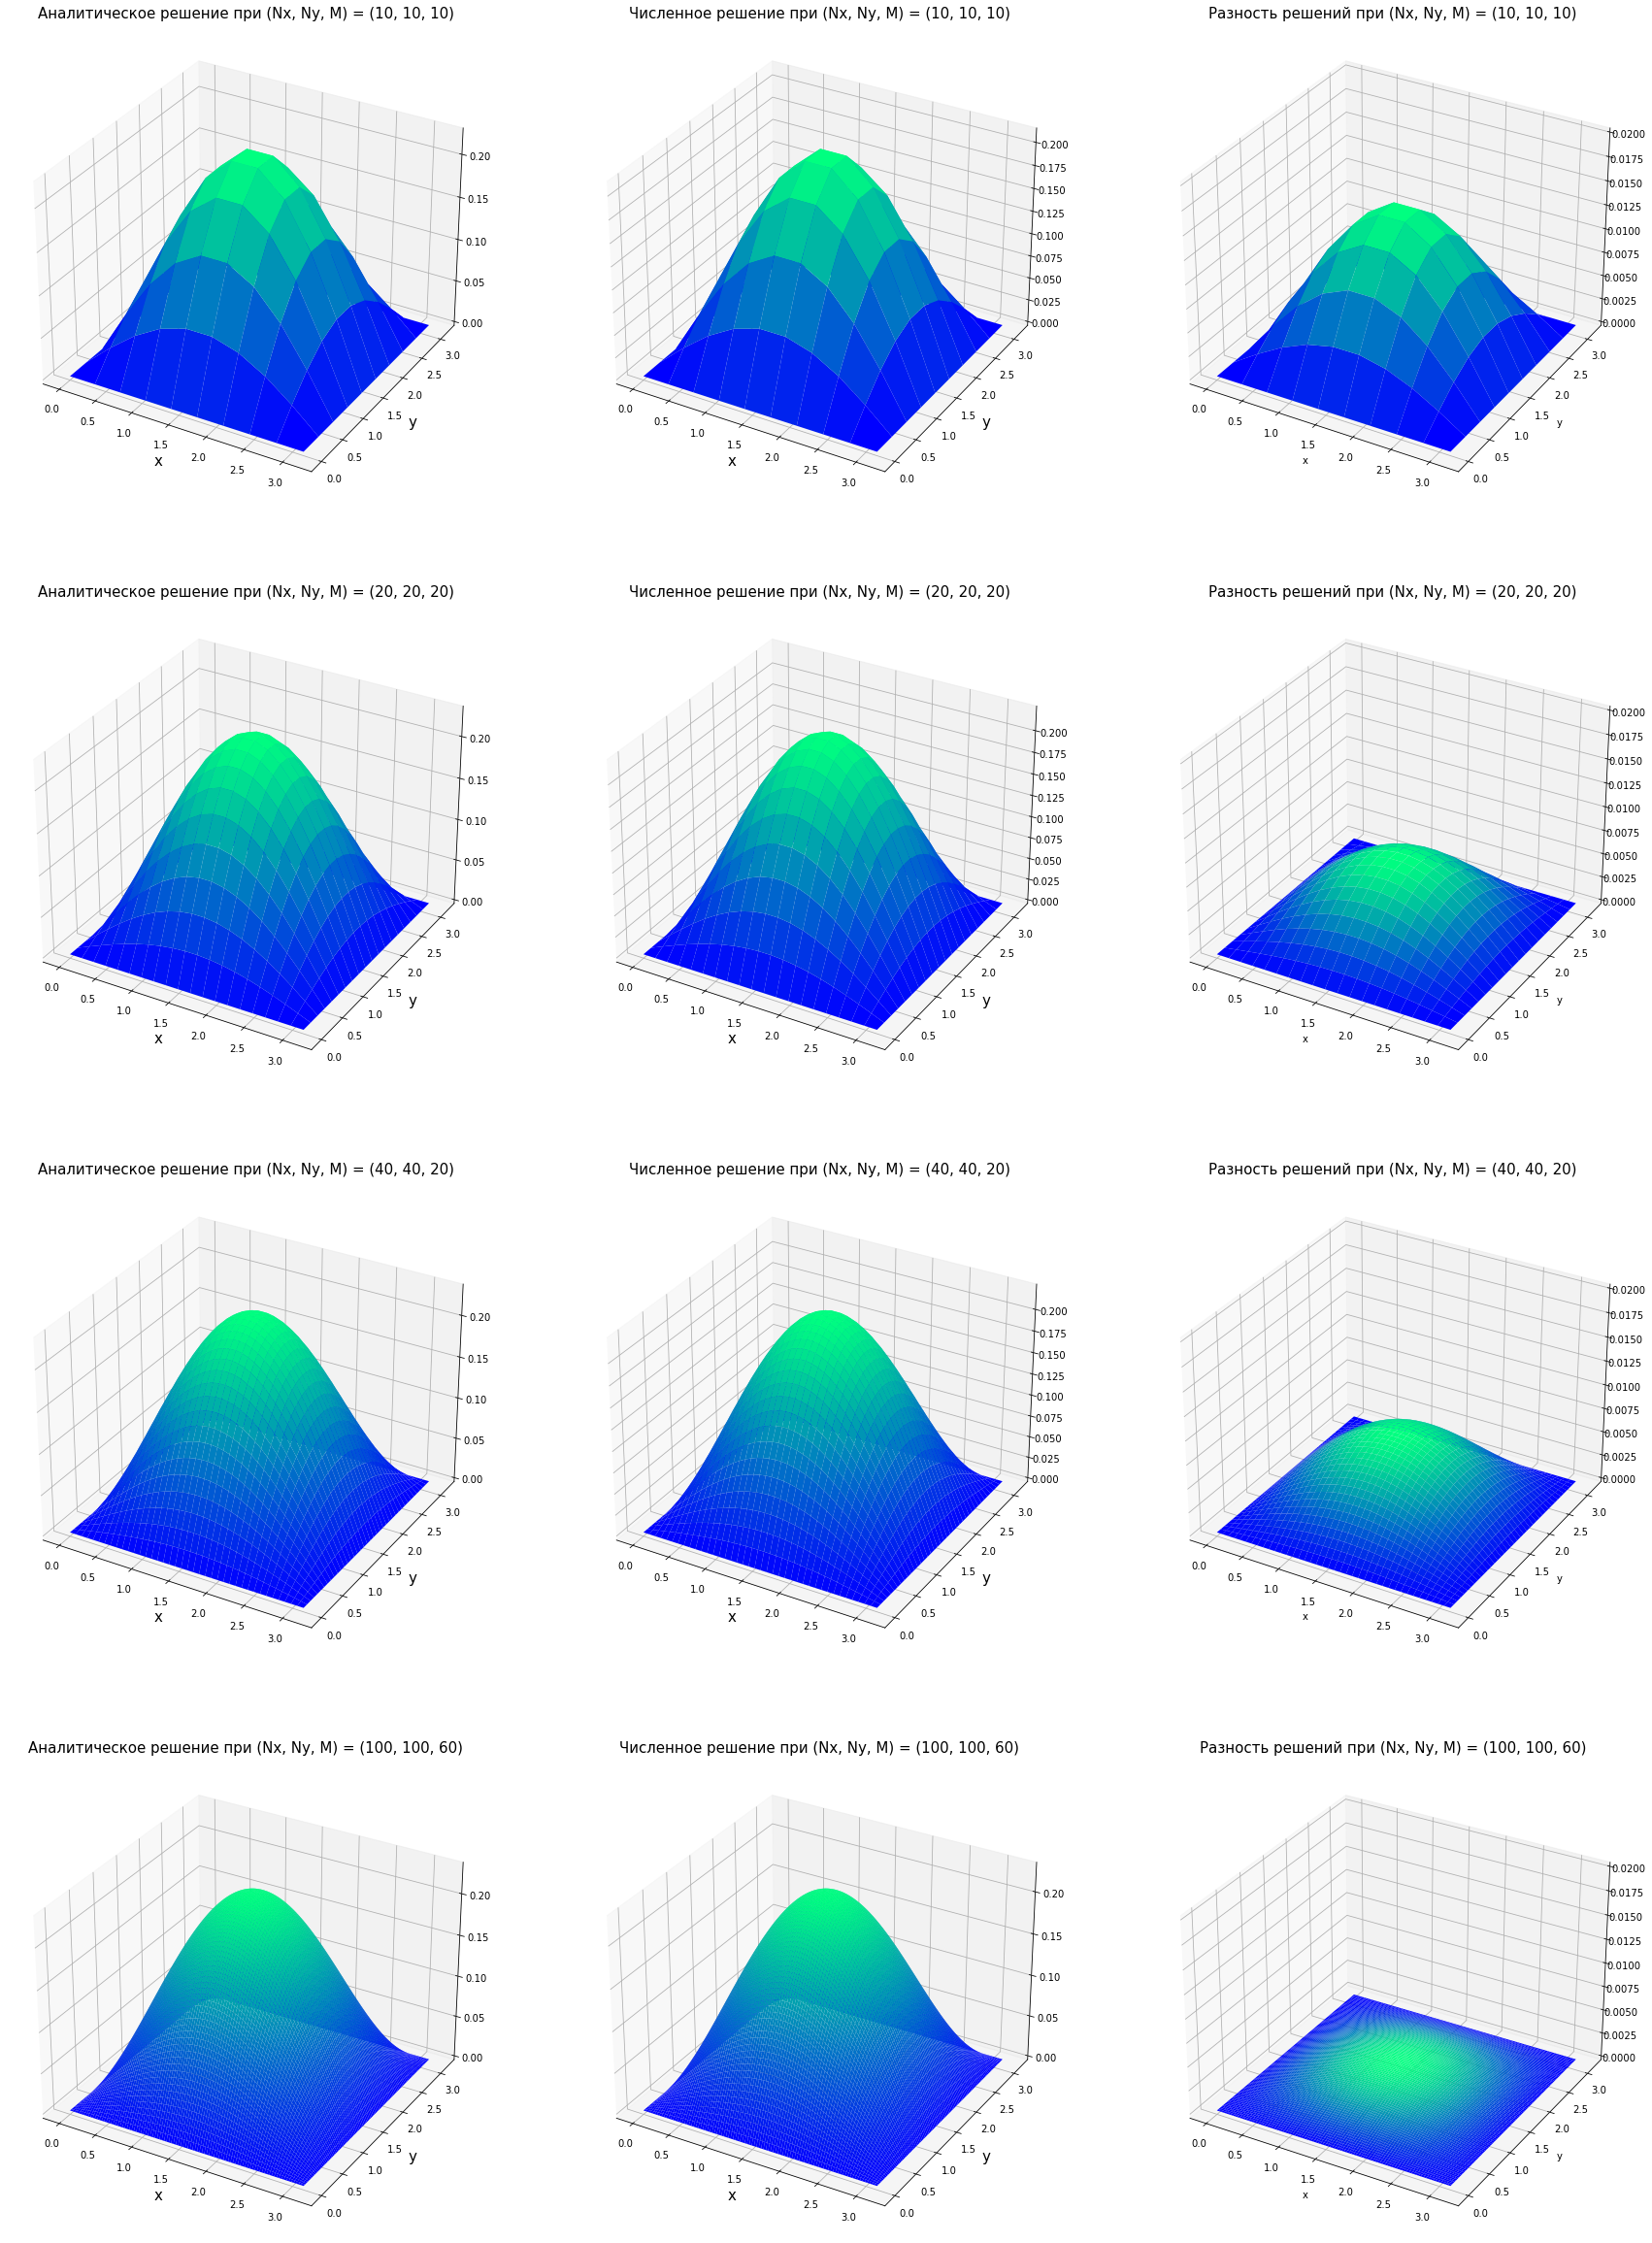

In [14]:
#Nx, Ny, M = 100, 100, 60 # шаги сетки

Nx_Ny_M = [(10, 10, 10), (20, 20, 20), (40, 40, 20), (100, 100, 60)]

x0, x1 = 0, np.pi
y0, y1 = 0, np.pi
t0, t1 = 0, 1

fig = plt.figure(figsize=(30,42))
num = 1

for _just_for_loop_, step in enumerate(Nx_Ny_M):
    Nx, Ny, M = step
    #print(Nx, Ny, M)
    
    x = np.linspace(x0, x1, Nx)
    y = np.linspace(y0, y1, Ny)
    t = np.linspace(t0, t1, M)

    h_x = (x1 - x0)/(Nx - 1)
    h_y = (y1 - y0)/(Ny - 1)
    tau = (t1 - t0)/(M - 1)

    gamma_1 = tau / (h_x**2) # гамма_1
    gamma_2 = tau / (h_y**2) # гамма_2

    u = np.zeros((Nx, Ny, 2*M + 1 ))
    
    u[:,:,0] = 0
    
    for j in range(1,2*M,2):
        for i2 in range(1,Ny-1):
            run_x(i2, j)
        for i1 in range(1,Nx-1):
            run_y(i1, j+1)
            
    u_tochn = np.zeros((Nx, Ny, M))
                
    for n in range(Nx):
        for m in range(Ny):
            for j in range(M):
                u_tochn[n, m, j] = np.sin(x[n])*np.sin(y[m])*np.exp(-2*t[j])*(np.exp(t[j]) - 1)
            
    y, x = np.meshgrid(y, x)
    ax = fig.add_subplot(4, 3, num, projection='3d')
    surf=ax.plot_surface(x, y, u_tochn[:,:,-1], rstride=1, cstride=1, cmap = 'winter')
    plt.title('Аналитическое решение при (Nx, Ny, M) = ' + str(step), fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    ax.set_zlim3d(bottom=0, top=max(np.amax(u_tochn[:,:,-1]), np.amax(u[:,:,-1])))
    num += 1
    ax = fig.add_subplot(4, 3, num, projection='3d')
    surf=ax.plot_surface(x, y, u[:,:,-1], rstride=1, cstride=1, cmap = 'winter')
    plt.title('Численное решение при (Nx, Ny, M) = ' + str(step), fontsize=15) 
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    num += 1
    ax = fig.add_subplot(4, 3, num, projection='3d')
    surf = ax.plot_surface(x, y, u_tochn[:,:,-1] - u[:,:,-1], rstride=1, cstride=1, cmap='winter')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Разность решений при (Nx, Ny, M) = ' + str(step), fontsize=15) 
    ax.set_zlim3d(bottom=0, top=0.02)#max(np.amax(u_tochn[:,:,-1]), np.amax(u[:,:,-1])))
    num += 1

# Порядок убывания ошибки
Для того, чтобы убедиться в том, что невязка равна $O(h_x^2 + h_y^2 + \tau^2)$ (т.е. что ошибка убывает с порядком $2$), достаточно показать, что величина, равная отношению разности аналитического и численного решения, деленной на величину $h_x^2 + h_y^2 + \tau^2$, и самой величины $h_x^2 + h_y^2 + \tau^2$, есть конечная величина. Иначе говоря, достаточно показать, что
$$
\lim_{h_x \rightarrow \infty \\ h_y \rightarrow \infty \\ \tau \rightarrow \infty} \psi' = Const \\
\psi' =  \frac{u_{аналит} - u_{числ}}{h_x^2 + h_y^2 + \tau^2} 
$$

Построение соответствующего графика:

In [ ]:
#fig = plt.figure(figsize=(20,10))
#fig, ax =plt.subplots(figsize=(10,10))
fig = plt.figure(figsize=(20,10))


Nx_Ny_M = [(5, 5, 5), (10, 10, 10), (20, 20, 20), (40, 40, 40), (50, 50, 50), (100, 100, 100)]

x0, x1 = 0, np.pi
y0, y1 = 0, np.pi
t0, t1 = 0, 1

H_H_Tau = []
sqrt_H_H_Tau = []
Raznost = []
C1_sqrt_H_H_Tau = []
C2_sqrt_H_H_Tau = []
C1, C2 = 0.05, 0.02

plt.subplot(1, 2, 1)
plt.title('Разность аналит. и числ. решений при t=1, y=π/2 при разных (Nx, Ny, M)', fontsize=15)
#plt.xlim()
plt.ylim(0, 0.1)
plt.xlabel('x', fontsize=15)
plt.ylabel('u_аналит - u_числ', fontsize=15)

for _just_for_loop_, step in enumerate(Nx_Ny_M):
    
    Nx, Ny, M = step
    
    x = np.linspace(x0, x1, Nx)
    y = np.linspace(y0, y1, Ny)
    t = np.linspace(t0, t1, M)

    h_x = (x1 - x0)/(Nx - 1)
    h_y = (y1 - y0)/(Ny - 1)
    tau = (t1 - t0)/(M - 1)

    gamma_1 = tau / (h_x**2) # гамма_1
    gamma_2 = tau / (h_y**2) # гамма_2

    u = np.zeros((Nx, Ny, 2*M + 1 ))
    
    u[:,:,0] = 0
    
    for j in range(1,2*M,2):
        for i2 in range(1,Ny-1):
            run_x(i2, j)
        for i1 in range(1,Nx-1):
            run_y(i1, j +1)
            
    u_tochn = np.zeros((Nx, Ny, M))
                
    for n in range(Nx):
        for m in range(Ny):
            for j in range(M):
                u_tochn[n, m, j] = np.sin(x[n])*np.sin(y[m])*np.exp(-2*t[j])*(np.exp(t[j]) - 1)
    
    
    #plt.subplot(2, 1, 1)
    plt.plot(x, u_tochn[:,int(Ny/2),-1] - u[:,int(Ny/2),-1], color = "blue", linewidth=1)
    #plt.title('Разность аналит. и числ. решений при t=1, y=π/2 при разных (Nx, Ny, M)', fontsize=11)
    #plt.xlim()
    #plt.ylim(0, 0.2)
    #plt.xlabel('x', fontsize=11)
    #plt.ylabel('u', fontsize=11)
    

    #np.append(H_H_Tau, h_x**2+h_y**2+tau**2)
    H_H_Tau.append(h_x**2+h_y**2+tau**2)
    #np.append(sqrt_H_H_Tau, np.sqrt(h_x**2+h_y**2+tau**2))
    sqrt_H_H_Tau.append(np.sqrt(h_x**2+h_y**2+tau**2))
    #np.append(Raznost, np.amax(u_tochn[:,:,-1] - u[:,:,-1]))
    Raznost.append(np.amax(u_tochn[:,:,-1] - u[:,:,-1])/(h_x**2+h_y**2+tau**2))
    C1_sqrt_H_H_Tau.append(C1*np.sqrt(h_x**2+h_y**2+tau**2))
    C2_sqrt_H_H_Tau.append(C2*np.sqrt(h_x**2+h_y**2+tau**2))
    
    
              
    #plt.subplot(2, 1, 2)
    #plt.title('ошибка (x,t)', fontsize=11)\
    #plt.ylim(0, 1)
    #plt.xlabel('x', fontsize=11)
    #plt.ylabel('u', fontsize=11)
    #plt.plot(h_x**2+h_y**2+tau**2, np.amax(u_tochn[:,:,-1] - u[:,:,-1]), color = "blue")#, linewidth=1)
    #plt.plot(h_x**2+h_y**2+tau**2, np.sqrt(h_x**2+h_y**2+tau**2),  color = "red")#, linewidth=1)
    #print(h_x**2+h_y**2+tau**2, np.amax(u_tochn[:,:,-1] - u[:,:,-1]))


              
plt.subplot(1, 2, 2)
plt.title('Зависимость удельной невязки от hx^2 + hy^2 + tau^2', fontsize=15)
#plt.ylim(0, 1)
plt.xlabel('hx^2 + hy^2 + tau^2', fontsize=15)
plt.ylabel('psi', fontsize=15)
plt.ylim(0, 1)
plt.plot(H_H_Tau, Raznost, color = "blue", linewidth=1)
#plt.plot(H_H_Tau, sqrt_H_H_Tau,  color = "red", linewidth=1)
#plt.plot(H_H_Tau, C1_sqrt_H_H_Tau,  color = "green", linewidth=1)
#plt.plot(H_H_Tau, C2_sqrt_H_H_Tau,  color = "green", linewidth=1)

#print(H_H_Tau, sqrt_H_H_Tau, Raznost)
#print(h_x**2+h_y**2+tau**2, np.amax(u_tochn[:,:,-1] - u[:,:,-1]))        
plt.show()

Видно, что величина, обозначенная ранее как $\psi'$, действительно стремится к конечной велиине. Следовательно:
$$
\psi = O(h_x^2 + h_y^2 + \tau^2)
$$

# Проверка выполнения начального и граничных условий
Проверка выполнения начального условия приведена ниже. В выполнении граничных условий можно убедиться по графикам, построенным выше.

In [ ]:
Nx, Ny, M = 60, 60, 30 # шаги сетки

x0, x1 = 0, np.pi
y0, y1 = 0, np.pi
t0, t1 = 0, 1 #0.19095477 #1

x = np.linspace(x0, x1, Nx)
y = np.linspace(y0, y1, Ny)
t = np.linspace(t0, t1, M)

h_x = (x1 - x0)/(Nx - 1)
h_y = (y1 - y0)/(Ny - 1)
tau = (t1 - t0)/(M - 1)

gamma_1 = tau / (h_x**2) # гамма_1
gamma_2 = tau / (h_y**2) # гамма_2

u = np.zeros((Nx, Ny, 2*M + 1 ))

#u_tochn = np.zeros((Nx, Ny, M))
                
#for n in range(Nx):
 #   for m in range(Ny):
  #      for j in range(M):
   #         u_tochn[n, m, j] = np.sin(x[n])*np.sin(y[m])*np.exp(-2*t[j])*(np.exp(t[j]) - 1)
            
for j2 in range(1,2*M,2):
    for i2 in range(1,Ny-1):
        run_x(i2, j2)
    for i1 in range(1,Nx-1):
        run_y(i1, j2 +1)

fig = plt.figure(figsize=(10,10))
y, x = np.meshgrid(y, x)
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(y, x, u[:,:,0], rstride=1, cstride=1, cmap='winter')
plt.title('Численное решение при t=0')
plt.xlabel('x')
plt.ylabel('y')


plt.show() 

# 3. Графики u(x,y,t) при раличных значениях t

In [ ]:
#Nx_Ny_M = [(60, 60, 60), (60, 60, 60), (60, 60, 60), (60, 60, 60)]
Nx, Ny, M = 50, 50, 50 # шаги сетки
T = [2, 5, 10, 25, 49] # номера срезов массива, t = N_среза * 0.02 (точнее - 0.020408...)

x0, x1 = 0, np.pi
y0, y1 = 0, np.pi
t0, t1 = 0, 1

x = np.linspace(x0, x1, Nx)
y = np.linspace(y0, y1, Ny)
t = np.linspace(t0, t1, M)

h_x = (x1 - x0)/(Nx - 1)
h_y = (y1 - y0)/(Ny - 1)
tau = (t1 - t0)/(M - 1)

gamma_1 = tau / (h_x**2) # гамма_1
gamma_2 = tau / (h_y**2) # гамма_2

u = np.zeros((Nx, Ny, 2*M + 1 ))
    
u[:,:,0] = 0
    
for j in range(1,2*M,2):
    for i2 in range(1,Ny-1):
        run_x(i2, j)
    for i1 in range(1,Nx-1):
        run_y(i1, j +1)
            
u_tochn = np.zeros((Nx, Ny, M))
                
for n in range(Nx):
    for m in range(Ny):
        for j in range(M):
            u_tochn[n, m, j] = np.sin(x[n])*np.sin(y[m])*np.exp(-2*t[j])*(np.exp(t[j]) - 1)

fig = plt.figure(figsize=(20,50))
num = 1

y, x = np.meshgrid(y, x)

for _just_for_loop_, step in enumerate(T):
    time = step
            
    ax = fig.add_subplot(5, 2, num, projection='3d')
    surf=ax.plot_surface(x, y, u_tochn[:,:,time], rstride=1, cstride=1, cmap = 'winter')
    plt.title('Аналитическое решение при t = ' + str(round(time*0.020408, 2)), fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    ax.set_zlim3d(bottom=0, top=0.2)
    num += 1
    
    ax = fig.add_subplot(5, 2, num, projection='3d')
    surf=ax.plot_surface(x, y, u[:,:,2*time], rstride=1, cstride=1, cmap = 'winter')
    plt.title('Численное решение при t = ' + str(round(time*0.020408, 2)), fontsize=15) 
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    ax.set_zlim3d(bottom=0, top=0.2)#max(np.amax(u_tochn[:,:,-1]), np.amax(u[:,:,-1])))
    num += 1

# Итоги
В результате выполнения работы:
1. Поставлена задача на уравнение теплопроводности
2. Построено точное решение
3. Выписана разностная схема (Писмена-Рэкфорда)
4. Исследована аппроксимация, устойчивость, описан алгоритм расчета
5. Проведен расчет на сгущающихся сетках
6. Выполнена проверка начального и граничных условий
7. Приведен код программы